## 1. Máquinas de aprendizaje aplicadas a la medicina

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import copy
from matplotlib import pyplot as plt 
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'

> a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).

In [2]:
df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age           270 non-null float64
sex           270 non-null object
chest_pain    270 non-null object
blood_p       270 non-null float64
serum         270 non-null float64
blood_s       270 non-null object
electro       270 non-null object
max_heart     270 non-null float64
angina        270 non-null object
oldpeak       270 non-null float64
slope         270 non-null object
vessel        270 non-null float64
thal          270 non-null object
normal        270 non-null int64
dtypes: float64(6), int64(1), object(7)
memory usage: 29.6+ KB


In [4]:
df.describe()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,1.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,1.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,2.000000


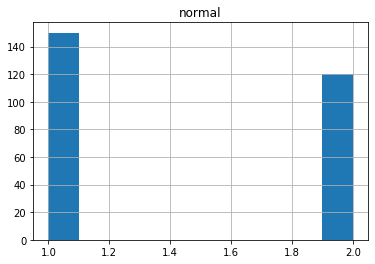

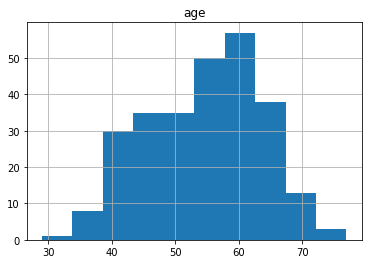

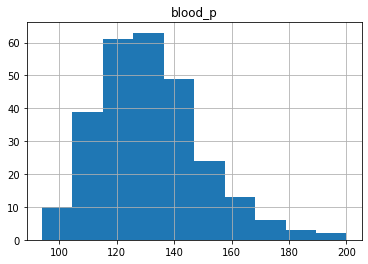

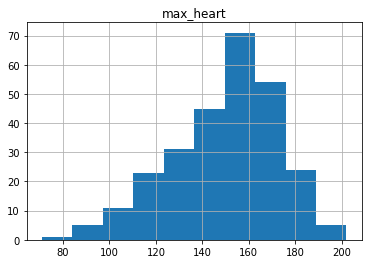

In [5]:
h0=df.hist(column="normal")
h1=df.hist(column="age")
h2=df.hist(column="blood_p")
h3=df.hist(column="max_heart")

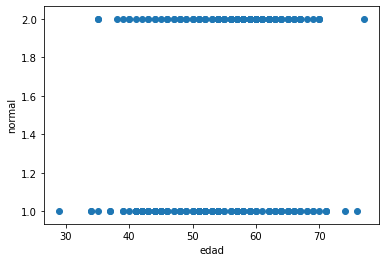

In [6]:
plt.scatter(df.age,df.normal)
plt.ylabel('normal')
plt.xlabel('edad')
plt.show()

Se tiene un dataset 14x270 constituido por 13 atributos (más una variable dependiente a predecir) recolectados de un total de 270 pacientes. El atributo "normal" describe si tiene tiene una enfermedad cardiáca, siendo 2 para los casos positivos y 1 para los negativos. Éste es la variable dependiente Y que se busca predecir.
De los gráficos se puede observar que 150 pacientes están sanos y 120 enfermos. La edad varía entre los 30 y 80 años aproximadamente, concentrándose la mayoría entre los 40 y 70 años. 

> b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como *one hot vectors*, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**

In [7]:
df = pd.get_dummies(df)
df1= copy.deepcopy(df) #df auxiliar que se usará más adelante
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


Los atributos crecieron de 13 a 25 (sin considerar la columna "normal") debido a la descategorización de los atributos originales. 
Cuando se tiene una variable categórica con get_dummies se crean X variables dummies con resultados binarios (0,1) que indican la ausencia o presencia de tales variables. Esto es útil ya que se pueden representar múltiples categorías de subgrupos en una regresión lineal. Del ejemplo propuesto en el enunciado, se pueden hacer regresiones sólo para pacientes mujeres, o sólo para pacientes hombres, en vez de considerar el caso de ambos al mismo tiempo como en la variable "sex".
Claramente lo anterior puede crear overfitting ya que habrá variables que son linealmente dependientes entre sí. Por ejemplo sex_female es la negación a sex_male, ya que sabiendo que alguien es mujer de inmediato se entiende que no es hombre.


> c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos intereserá predecir en esta instancia (*target*) con un modelo de regresión lineal.

In [8]:
class_label = df.pop("normal").values -1
reg_label = df.pop("blood_p").values
df2=copy.deepcopy(df) #df auxiliar que se usará más adelante
X_data = df.values

> d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.

In [9]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30

In [10]:
X_train = X_data[~mask_test] 
X_test = X_data[mask_test]
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]
class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (184, 24)
Test:  (86, 24)


> e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**. 

In [11]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

La idea de realizar este paso es "normalizar" los datos centrándolos de tal forma que su promedio sea cero y su desviación estándar sea 1, de esta forma la distribución de cada dato será la misma que el valor original.
Con ello se busca eliminar la idea de escalas en las medidas, ya que por ejemplo datos en kilometros o en metros afectarían de forma distinta a la regresión sólo por sus magnitudes.

> f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un *quantile-quantile plot* determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

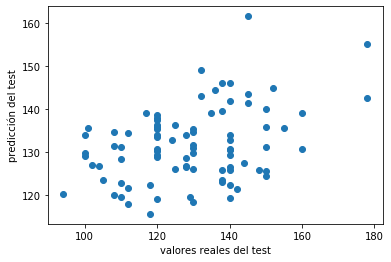

In [12]:
from sklearn.linear_model import LinearRegression as LR
model = LR(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)
residuo_train = reg_label_train - reg_pred_train
residuo_test = reg_label_test - reg_pred_test
plt.scatter(reg_label_test,reg_pred_test)
plt.ylabel('predicción del test')
plt.xlabel('valores reales del test')
plt.show()

A simple vista no pareciera que la regresión sea lineal, probablemente se encontrarán errores altos y coeficientes de correlación muy bajos.

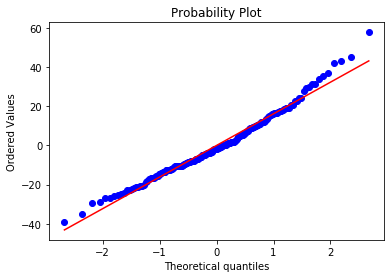

In [13]:
import pylab 
import scipy.stats as stats
stats.probplot(residuo_train, dist="norm", plot=pylab)
pylab.show()

Pero, del gráfico anterior, el residuo obtenido de la predicción de los datos de entrenamiento claramente sigue una distribución normal para la gran mayoría de los datos.

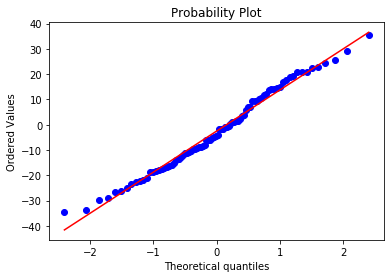

In [14]:
stats.probplot(residuo_test, dist="norm", plot=pylab)
pylab.show()

Del gráfico QQ obtenido con los residuos sobre los datos de test, también se observa una distribución normal.

Por tanto se puede concluir, que al menos, el supuesto de normalidad en el residuo sí se cumple.

> g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?

De la página 12 de la diapositiva "Selección de Atributos", se asumió que teniendo una distribución normal para el error (la cual se verificó en el punto anterior) entonces el Z-score es:

$$Z\,(i)=\frac{\hat{a_{i}}}{STD\,(\hat{a_{i}})}$$

donde los términos   $\hat{a_{i}}$   y   $STD\,(\hat{a_{i}})$ son:

$$ 
\hat{a_{i}} = \frac{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)\cdot \left(Y_{j}-\bar{Y}\right)}{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)^{2}}
$$

$$
STD\,(\hat{a_{i}}) = \frac{\sigma}{\sqrt{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)^{2}}}
$$

y además la desviación estandar $\sigma$ se puede estimar insesgadamente con:

$$
\hat{\sigma}^{2} = \frac{\sum\left(\hat{Y}-Y\right)^{2}}{N-d-1}
$$

donde $d=1$ para reducir 1 grado de libertad debido a que se asumió normalidad.

Reemplazando todo lo anterior en el Z-score se tiene que:
$$
Z\,(i)= \frac{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)\cdot \left(Y_{j}-\bar{Y}\right)}{\sqrt{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)^{2}}} \cdot \sqrt{\frac{N-2}{\sum\left(\hat{Y}-Y\right)^{2}}}
$$


El F-score es explicado en la página 14 de la misma diapositiva y queda definido como:

$$
F\,(i) = \frac{\frac{SSR(i)}{1}}{\frac{SSE(i)}{N-2}}
$$

donde $SSR(i)$ y $SSE(i)$ se son:

$$
SSR(i) = \sum\left(\hat{Y}_{i}-\bar{Y}\right)^{2}
$$

$$
SSE(i) = \sum\left(\hat{Y}_{i}-Y\right)^{2}
$$

Reemplazando todo lo anterior en el F-score se tiene que:

$$
F\,(i) = \frac{(N-2)\cdot \sum\left(\hat{Y}_{i}-\bar{Y}\right)^{2}}{\sum\left(\hat{Y}_{i}-Y\right)^{2}}
$$

El Peso corresponderá a los coeficientes de la regresión.

El coeficiente de correlacion $R_{i}^{2}$ se puede obtener con la siguiente fórmula:

$$
R_{i}^{2} = \frac{SSR(i)}{SST} =\frac{SSR(i)}{SSR(i)+SSE(i)}
$$

De lo anterior se pueden crear las siguientes funciones:

In [15]:
def z_score(x,y,y_pred):
    a = (sum((x-np.mean(x))*(y-np.mean(y)))/(sum((x-np.mean(x))**2))**0.5)
    b = ((len(x)-2)/sum((y_pred-y)**2))**0.5
    try:
        z = a*b
    except:
        z = 0
    return z

def f_score(y,y_pred):
    ssr = sum((y_pred-np.mean(y))**2)
    sse = sum((y_pred-y)**2)
    try:
        f = (len(y)-2)*ssr/sse
    except:
        f = 0
    return f

def coef_correlacion(y,y_pred):
    ssr = sum((y_pred-np.mean(y))**2)
    sse = sum((y_pred-y)**2)
    try:
        r2 = ssr/(ssr+sse)
    except:
        r2 = 0
    return r2

A continuación se aplicarán las funciones para realizar la tabla pedida, destacando el hecho de que la regresión lineal se hizo para la totalidad de los datos (no se separó en entrenamiento y test) tanto por simplicidad como para realizar una comparación definitiva de ambos scores:

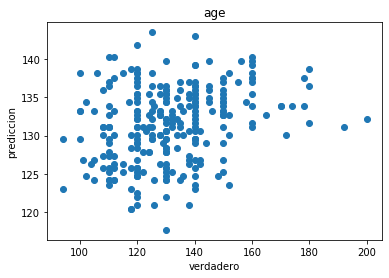

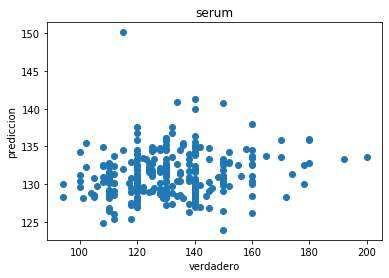

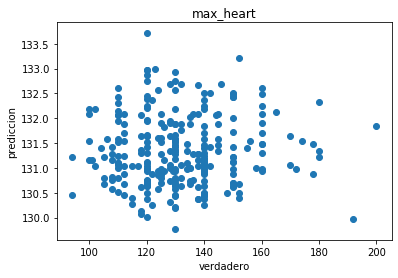

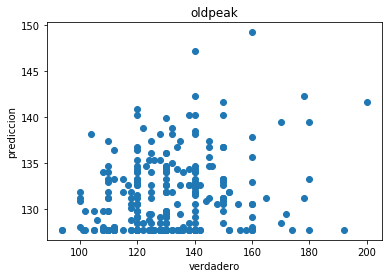

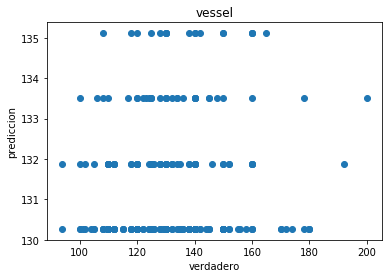

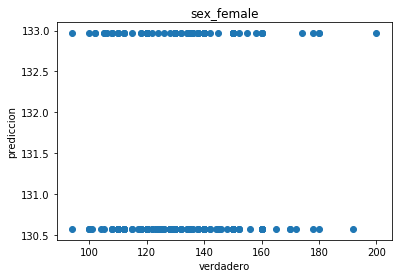

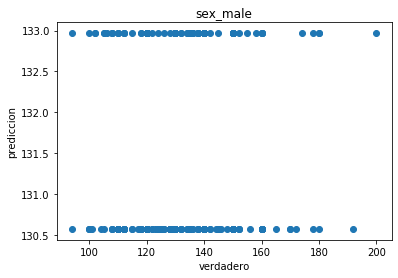

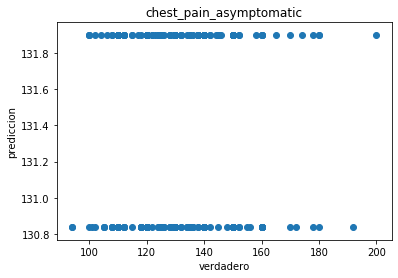

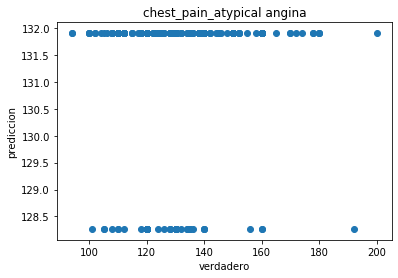

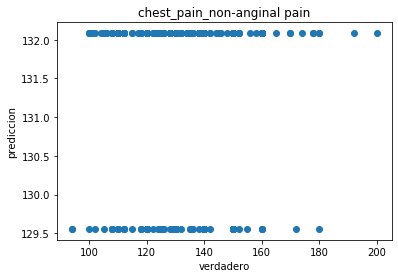

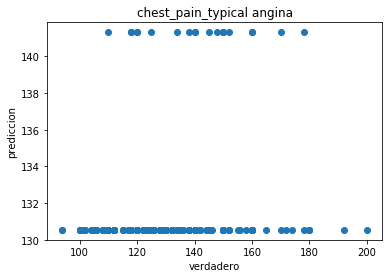

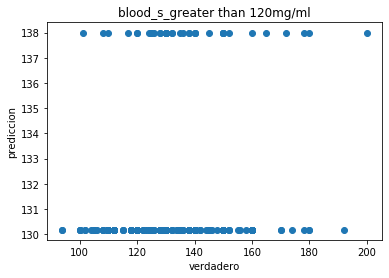

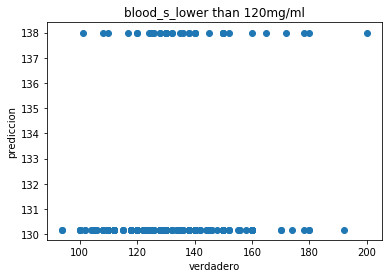

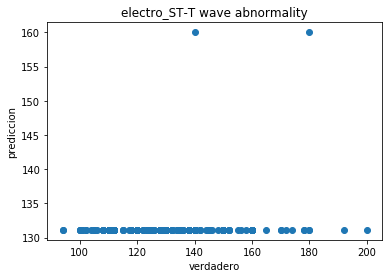

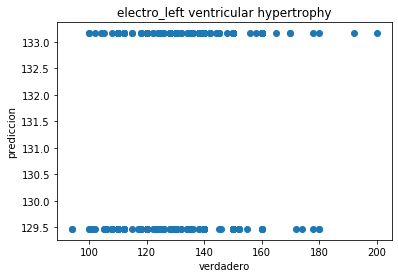

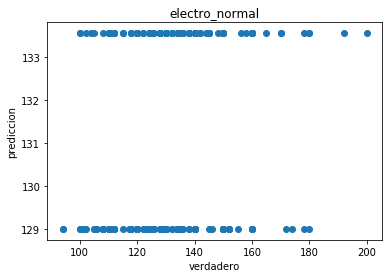

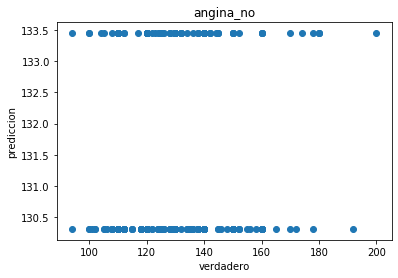

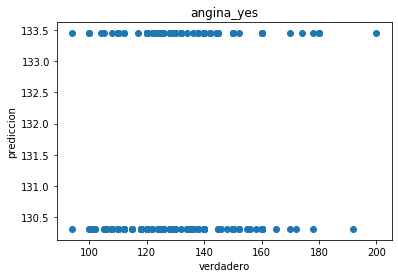

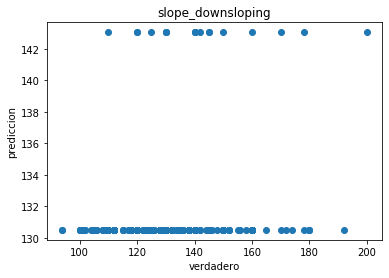

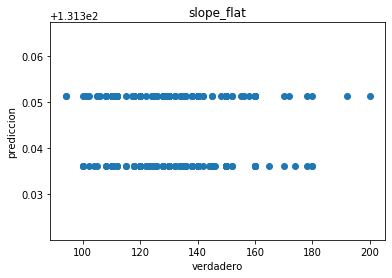

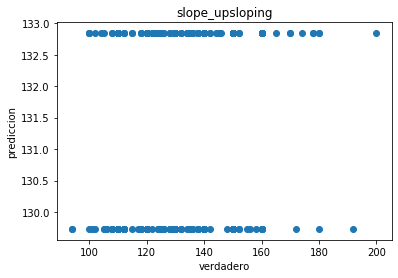

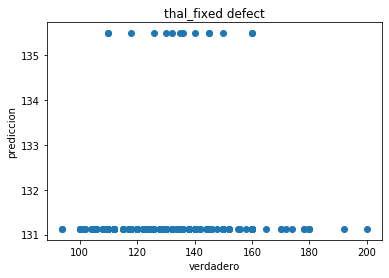

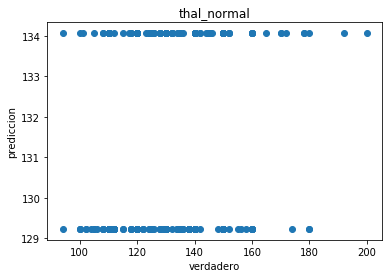

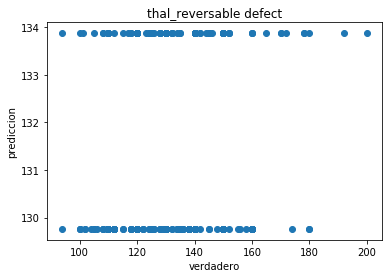

In [16]:
tabla = {'atributo' :[], 'Z-Score':[], 'F-Score':[], 'Peso':[], 'R^2':[]}
X_tabla = copy.deepcopy(df2)
y_tabla = copy.deepcopy(reg_label)
y_tabla.shape = (y_tabla.shape[0],1) #reshape de fila a columna
atributos = list (X_tabla)
for atributo in atributos:
    tabla['atributo'].append(atributo)
    valores = np.array(X_tabla[atributo])
    valores.shape = (valores.shape[0],1) #reshape de fila a columna
    std.fit(valores)
    valores_std = std.transform(valores)
    model.fit(valores_std,y_tabla)
    y_tabla_pred = model.predict(valores_std)
    tabla['Z-Score'].append(z_score(valores_std,y_tabla,y_tabla_pred)[0])
    tabla['F-Score'].append(f_score(y_tabla,y_tabla_pred)[0])
    tabla['Peso'].append(model.coef_[0][0])
    tabla['R^2'].append(coef_correlacion(y_tabla,y_tabla_pred)[0])
    plt.scatter(y_tabla,y_tabla_pred)
    plt.title(f'{atributo}')
    plt.ylabel('prediccion')
    plt.xlabel('verdadero')
    plt.show()

In [17]:
scores = pd.DataFrame.from_dict(tabla)
scores

,atributo,Z-Score,F-Score,Peso,R^2
0,age,4.646644,21.591299,4.868122,7.455783e-02
1,serum,2.875818,8.270328,3.084672,2.993564e-02
2,max_heart,-0.641169,0.411098,-0.697730,1.531600e-03
3,oldpeak,3.741434,13.998330,3.972187,4.963976e-02
4,vessel,1.408107,1.982766,1.527856,7.344047e-03
5,sex_female,1.028358,1.057520,1.117729,3.930462e-03
6,sex_male,-1.028358,1.057520,-1.117729,3.930462e-03
7,chest_pain_asymptomatic,0.487474,0.237631,0.530648,8.858968e-04
8,chest_pain_atypical angina,-1.218197,1.484004,-1.323018,5.506836e-03
9,chest_pain_non-anginal pain,-1.057781,1.118901,-1.149579,4.157647e-03


In [18]:
scores.sort_values(by='Z-Score',ascending=False).head()

,atributo,Z-Score,F-Score,Peso,R^2
0,age,4.646644,21.591299,4.868122,0.074558
3,oldpeak,3.741434,13.998330,3.972187,0.049640
18,slope_downsloping,2.919339,8.522540,3.129926,0.030820
1,serum,2.875818,8.270328,3.084672,0.029936
10,chest_pain_typical angina,2.618476,6.856417,2.815856,0.024945


In [19]:
scores.sort_values(by='F-Score',ascending=False).head()

,atributo,Z-Score,F-Score,Peso,R^2
0,age,4.646644,21.591299,4.868122,0.074558
3,oldpeak,3.741434,13.998330,3.972187,0.049640
18,slope_downsloping,2.919339,8.522540,3.129926,0.030820
1,serum,2.875818,8.270328,3.084672,0.029936
10,chest_pain_typical angina,2.618476,6.856417,2.815856,0.024945


In [20]:
scores.sort_values(by='Peso',ascending=False).head()

,atributo,Z-Score,F-Score,Peso,R^2
0,age,4.646644,21.591299,4.868122,0.074558
3,oldpeak,3.741434,13.998330,3.972187,0.049640
18,slope_downsloping,2.919339,8.522540,3.129926,0.030820
1,serum,2.875818,8.270328,3.084672,0.029936
10,chest_pain_typical angina,2.618476,6.856417,2.815856,0.024945


In [21]:
scores.sort_values(by='R^2',ascending=False).head()

,atributo,Z-Score,F-Score,Peso,R^2
0,age,4.646644,21.591299,4.868122,0.074558
3,oldpeak,3.741434,13.998330,3.972187,0.049640
18,slope_downsloping,2.919339,8.522540,3.129926,0.030820
1,serum,2.875818,8.270328,3.084672,0.029936
10,chest_pain_typical angina,2.618476,6.856417,2.815856,0.024945


En general Z-Score, F-Score, Peso y el coeficiente de correlación muestran una misma prioridad a la hora de escoger los atributos más importantes, pero claramente la regresión no es lineal ya que los coeficientes de correlación son muy bajos y ello se puede observar en los gráficos generados anteriormente.

> h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_squared_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_squared_error(reg_label_test, reg_pred_test))
print("MAE train: ", mean_absolute_error(reg_label_train, reg_pred_train))
print("MAE test: ", mean_absolute_error(reg_label_test, reg_pred_test))

MSE train:  259.84636749321413
MSE test:  260.55225123942284
MAE train:  12.528477942652312
MAE test:  13.544955799616536


El error absoluto medio (MAE) para ambos casos fue aproximadamente 13, el cual no pareciera ser grave. Pero se sabe que la regresión lineal no fue correcta para este caso.
EL error cuadrático medio (MSE) castiga con más severidad y muestra de mejor manera que con un aproximado de 260 para ambos casos (entrenamiento y test) la predicción mediante una regresión lineal no funciona.

>i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya.

In [23]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
mse_loo = 0
for train, val in loo.split(Xstd_train):
    linreg = LR(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_loo += mse_fold
    #print("%s %s" % (train, val))
print(f"MSE con K=1: {mse_loo}")

MSE con K=1: 62674.001631363055


In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mse_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LR(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
    #print("%s %s" % (train, val))
mse_cv = mse_cv / 5
print(f"MSE con K=5: {mse_cv}")

MSE con K=5: 362.1008805407525


Ambos errores son muy altos, en especial para K=1. Esto sólo indica la existencia de overfitting en el modelo lineal.

> j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa.

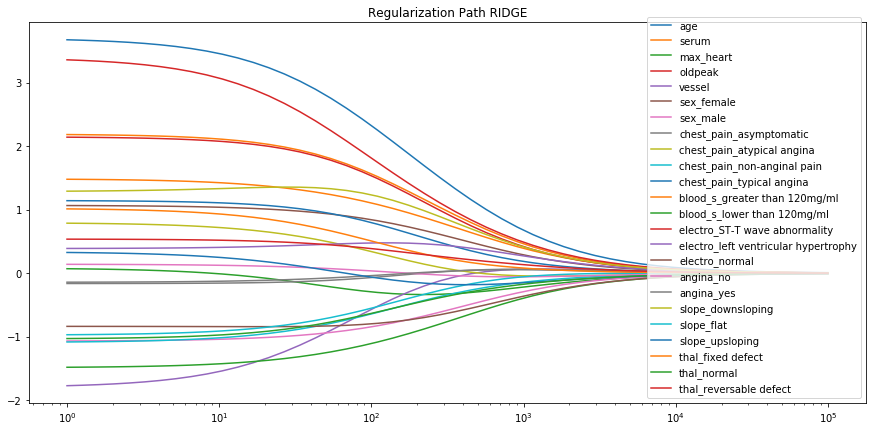

In [25]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

En el método de Ridge según el valor del $alpha$ todos los atributos  comienzan a acercarse a cero, algunos más rápido que otros. Como cabe esperarse, para valores muy altos de $alpha$ todos los atributos convergen a cero. 
A simple vista, entre los atributos que más se resisten a anularse están "age" y "oldpeak".

>k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?

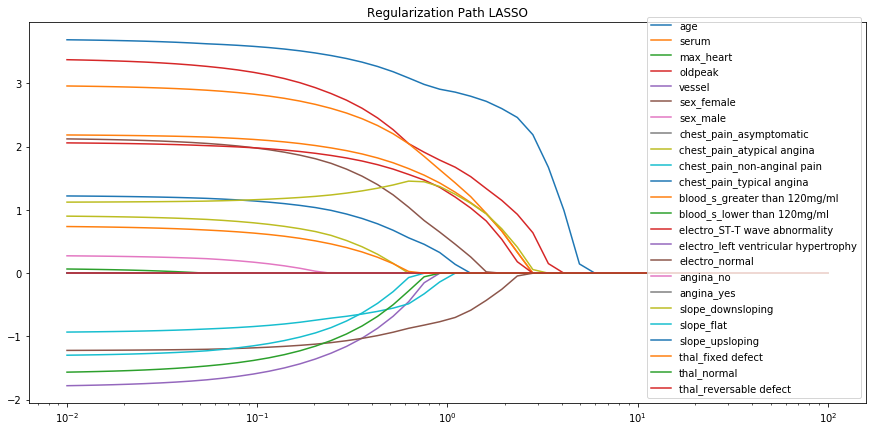

In [26]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path LASSO')
plt.legend(loc='lower right')
plt.show()

Con el método Lasso aquellos atributos que no superan cierto umbral son obligados a anularse. Ello permite escoger como atributos de interés, para un $alpha$ óptimo, aquellos que no sean cero.
Lo anterior permite apreciar de mejor manera en el gráfico cuales son los atributos que más resistencia ofrecen a convertirse en cero. Para este caso los evidentes son "age", "oldpeak" y "serum".

> l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la *widget* interactiva de *ipython*. Comente ¿Con qué valor de *alpha* se quedaría en cada caso?

In [27]:
from ipywidgets import interactive
def train_model(param):
    model = Ridge(fit_intercept=True, solver='svd')
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -15 #define your range
p_max = 15 #define your range
interactive(train_model, param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=15, min=-15), Output()), _dom_classes=('widg…

El parametro a escoger para Ridge es un $alpha = 10$ ya que es el que entrega un menor error cuadrático medio en el test.

In [28]:
from ipywidgets import interactive
def train_model(param):
    model = Lasso(fit_intercept=True)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -15 #define your range
p_max = 15 #define your range
interactive(train_model, param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=15, min=-15), Output()), _dom_classes=('widg…

El parametro a escoger para Lasso es un $alpha = 0.1$ ya que es el que entrega un menor error cuadrático medio en el test.

Para ambos casos los errores son bastante altos así que se sigue sospechando que estos métodos no tienen una regresión lineal para las predicciones con respecto a esta data.

> m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.

In [29]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    remaining = list(remaining)
    selected = []
    lista_nombres = []
    lista_scores = []
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        error_inicial = 100000
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            error_candidate = mean_absolute_error(y, predictions_train)
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        lista_nombres.append(names_x[best_candidate])
        lista_scores.append(best_new_score)
        #print ("selected = %s ..."%names_x[best_candidate])
        #print ("totalvars=%d, mae = %f"%(len(indexes),best_new_score))
    return selected, lista_scores, lista_nombres
features_fss_train, scores_fss_train, nombres_fss_train = fss(Xstd_train, reg_label_train, list(df))
features_fss_test, scores_fss_test, nombres_fss_test = fss(Xstd_test, reg_label_test, list(df))
need_feat_train = features_fss_train[:5]
need_scores_train = scores_fss_train[:5]
need_nombres_train = nombres_fss_train[:5]
need_feat_test = features_fss_train[:5]
need_scores_test = scores_fss_test[:5]
need_nombres_test = nombres_fss_test[:5]
print(need_nombres_train)
print(need_nombres_test)

['age', 'oldpeak', 'sex_female', 'slope_flat', 'electro_normal']
['chest_pain_typical angina', 'angina_no', 'max_heart', 'age', 'thal_normal']


Para los casos de entrenamiento los 5 atributos escogidos son: "age", "oldpeak", "sex_female", "slope_flat" y "electro_normal".
En cambio para los casos de prueba los 5 atributos son: 'chest_pain_typical angina', 'angina_no', 'max_heart', 'age', 'thal_normal'.

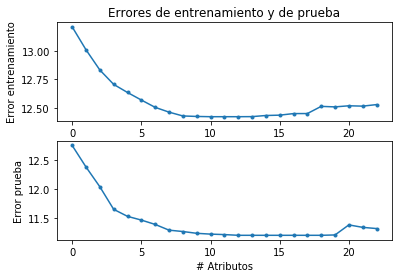

In [30]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(scores_fss_train, '.-')
plt.title('Errores de entrenamiento y de prueba')
plt.ylabel('Error entrenamiento')

plt.subplot(2, 1, 2)
plt.plot(scores_fss_test, '.-')
plt.xlabel('# Atributos')
plt.ylabel('Error prueba')

plt.show()

>n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.

```python
from sklearn.feature_selection import mutual_info_regression
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    remaining = list(remaining)
    selected = []
    lista_nombres = []
    lista_scores = []
    model = LR(fit_intercept=True, n_jobs=1)
    y_pred = model.fit(x,y).predict(x)
    while remaining and len(selected)<=k :
        MI_xy= mutual_info_regression(x,y_pred)
        aux =-100000
        for candidato in remaining:
            if(MI_xy[candidato]>=aux):
                aux = MI_xy[candidato]
                print(aux)
                aux2 = candidato
        lista_scores.append(aux)
        selected.append(aux2)
        lista_nombres.append(names_x[aux2])
        remaining.remove(aux2)
        x = np.delete(x,aux2, axis=1)
        return selected, lista_scores, lista_nombres
features_fss_train, scores_fss_train, nombres_fss_train = fss(Xstd_train, reg_label_train, list(df))
features_fss_test, scores_fss_test, nombres_fss_test = fss(Xstd_test, reg_label_test, list(df))
need_feat_train = features_fss_train[:5]
need_scores_train = scores_fss_train[:5]
need_nombres_train = nombres_fss_train[:5]
need_feat_test = features_fss_train[:5]
need_scores_test = scores_fss_test[:5]
need_nombres_test = nombres_fss_test[:5]
print(need_nombres_train)
print(need_nombres_test)
```

>o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (target). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?

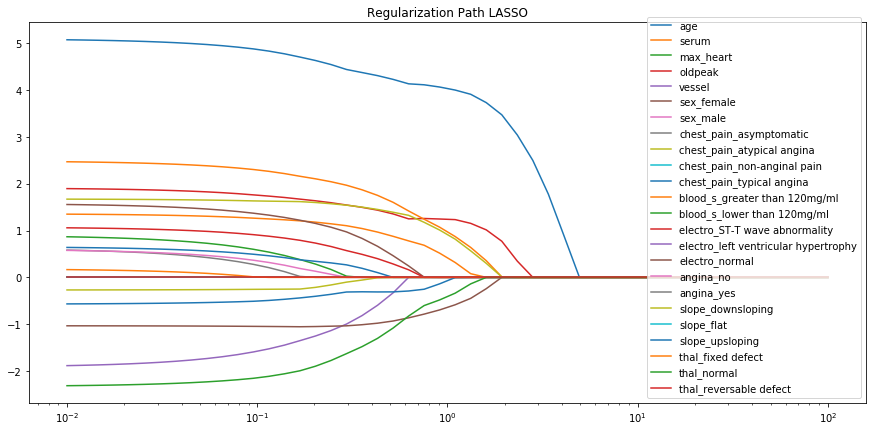

In [31]:
import random
N=184 #filas Xstd_train
D = random.randint(10, 100) #dejar fijo a 60 para probar la variación de stf
mu = random.uniform(-30, 30) #dejar fijo a 30 para probar la variación de std
std = random.uniform(5, 100)
F = np.random.normal(mu, std, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)

from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
    
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_new_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path LASSO')
plt.legend(loc='lower right')
plt.show()

Se utilizó el método de Lasso ya que visualmente se aprecia de inmediato en el gráfico si hay cambios o no, dependiendo de los atributos que se anulen últimos.   

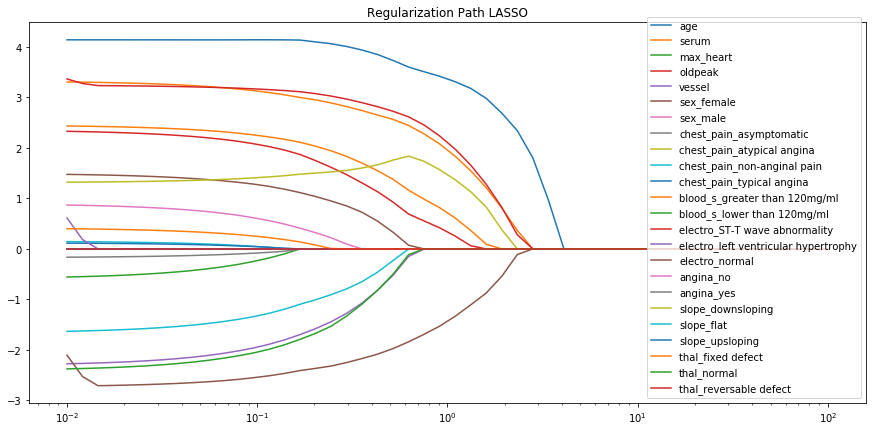

In [32]:
import random
N=184 #filas Xstd_train
D = 60 #random.randint(10, 100) #dejar fijo a 60 para probar la variación de stf
mu = 30 #random.uniform(-30, 30) #dejar fijo a 30 para probar la variación de std
std = 15#random.uniform(5, 100)
F = np.random.normal(mu, std, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)

from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
    
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_new_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path LASSO')
plt.legend(loc='lower right')
plt.show()

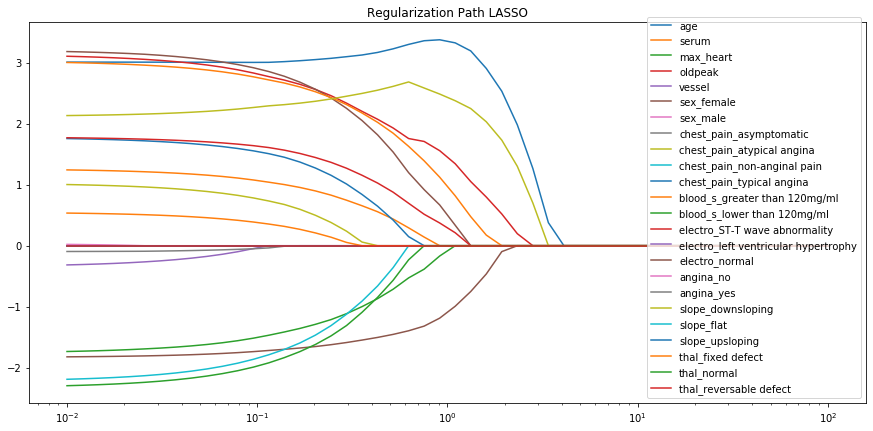

In [33]:
import random
N=184 #filas Xstd_train
D = 60 #random.randint(10, 100) #dejar fijo a 60 para probar la variación de stf
mu = 30 #random.uniform(-30, 30) #dejar fijo a 30 para probar la variación de std
std = 50#random.uniform(5, 100)
F = np.random.normal(mu, std, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)

from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
    
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_new_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path LASSO')
plt.legend(loc='lower right')
plt.show()

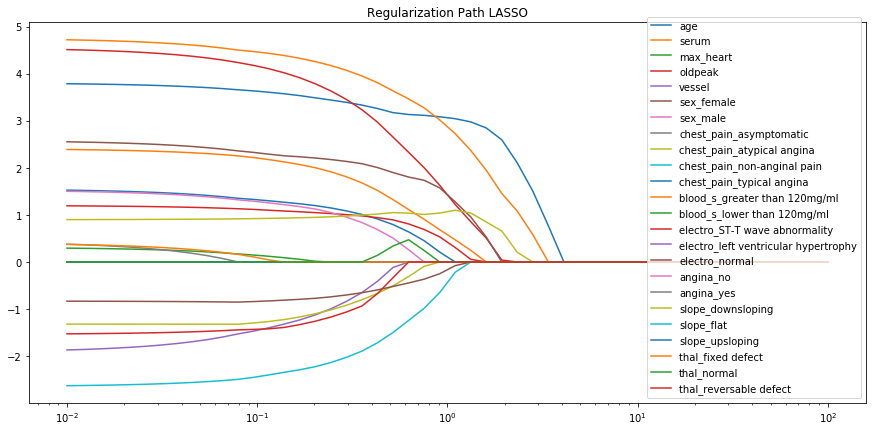

In [34]:
import random
N=184 #filas Xstd_train
D = 60 #random.randint(10, 100) #dejar fijo a 60 para probar la variación de stf
mu = 30 #random.uniform(-30, 30) #dejar fijo a 30 para probar la variación de std
std = 150#random.uniform(5, 100)
F = np.random.normal(mu, std, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)

from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
    
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_new_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path LASSO')
plt.legend(loc='lower right')
plt.show()

>p) Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.

In [35]:
from sklearn.linear_model import Lasso
mask_norm = class_label_train == 0 
model = Lasso(fit_intercept=True)
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test) 

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_squared_error(blood_p_tr, reg_pred_train))
print("MSE test: ", mean_squared_error(blood_p_te, reg_pred_test))
print("MAE train: ", mean_absolute_error(blood_p_tr, reg_pred_train))
print("MAE test: ", mean_absolute_error(blood_p_te, reg_pred_test))

MSE train:  55.15825141439314
MSE test:  47.836936606103016
MAE train:  5.39016690193965
MAE test:  5.328580139744189


A diferencia de la Regresión Lineal realizada en el apartado f), la regresión usando Lasso arrojó errores muy menores en comparación tanto para error cuadrático medio (MSE = 260 aprox. anteriormente) como error absoluto medio (MAE = 13 aprox. anteriormente).

> q) Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).

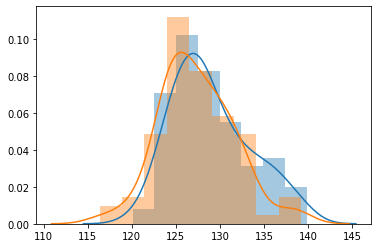

In [37]:
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()

Observando ese gráfico, donde la distribución azul representa los pacientes sanos y la otra distribución los enfermos, se determinó aproximadamente que bajo 128 es uno de los umbrales para que una persona esté enferma. El otro umbral se dejó como sobre 145 ya que en el gráfico no se aprecia que haya empíricamente algún umbral del tipo "blood_p mayor que..." para que una persona esté enferma. 

In [38]:
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
p_up=145
p_low=128
pred_train = predict_umbr(blood_p_tr, p_up, p_low)
pred_test = predict_umbr(blood_p_te, p_up, p_low)

> r) Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*

In [39]:
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

Score train:  0.5271739130434783
Score test:  0.5813953488372093


No se considera necesario reevaluar ya que, después de varias pruebas, los umbrales anteriores dieron los mejores scores y que son sobre el 50%.

> s) Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.

In [40]:
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 

Score train:  0.8315217391304348
Score test:  0.8023255813953488


El método del perceptrón fue mucho más preciso (cerca de un 22% más en el conjunto de prueba), pero a cambio el método debe ser más costoso por la cantidad de iteraciones utilizadas (1000 iteraciones en el peor caso).
La ventaja del framework del apartado q) es que es fácil de implementar ya que podrían verse a simple vista se ven los umbrales pedidos. La desventaja es que cuando las distribuciones son muy parecidas, como en este caso, esos umbrales son difíciles de identificar. Más aún en este caso, donde 150 de los pacientes está enfermo y el otro 120 está sano, y sus distribuciones eran similares lo que conlleva a que independiente de la elección de los umbrales, se entregue casi siempre scores del 50%. 

> t) Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train = pca.fit_transform(Xstd_train)
test = pca.fit_transform(Xstd_test)
principalDf = pd.DataFrame(data = train
             , columns = ['Columna 1', 'Columna 2'])
finalDf = pd.concat([principalDf, df1[['normal']]], axis = 1)
print('Dimensión conjunto de entrenamiento: {}'.format(train.shape))
print('Dimensión conjunto de prueba: {}'.format(test.shape))

Dimensión conjunto de entrenamiento: (184, 2)
Dimensión conjunto de prueba: (86, 2)


Si bien la cantidad de filas no vario para ambos conjuntos, las columnas se redujeron a 2 como se especificó en el enunciado.
A continuación se realizarán los gráficos:

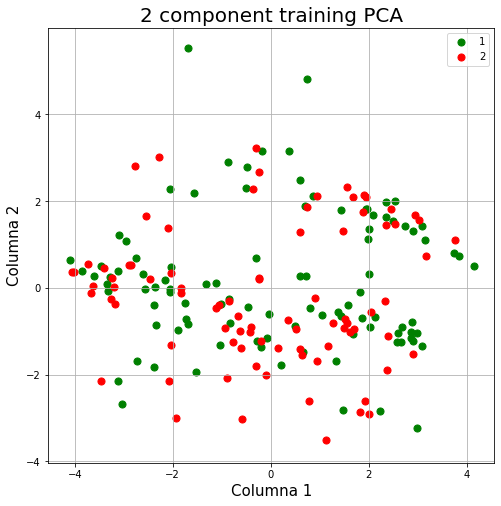

In [81]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Columna 1', fontsize = 15)
ax.set_ylabel('Columna 2', fontsize = 15)
ax.set_title('2 component training PCA', fontsize = 20)
targets = [1,2]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['normal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Columna 1']
               , finalDf.loc[indicesToKeep, 'Columna 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

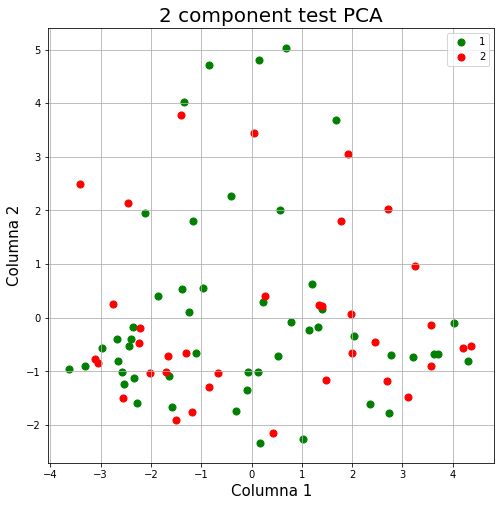

In [82]:
principalDf = pd.DataFrame(data = test
             , columns = ['Columna 1', 'Columna 2'])
finalDf = pd.concat([principalDf, df1[['normal']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Columna 1', fontsize = 15)
ax.set_ylabel('Columna 2', fontsize = 15)
ax.set_title('2 component test PCA', fontsize = 20)
targets = [1,2]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['normal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Columna 1']
               , finalDf.loc[indicesToKeep, 'Columna 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

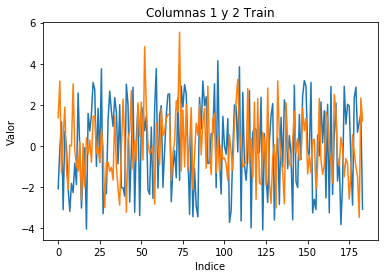

In [83]:
plt.plot(train)
plt.title('Columnas 1 y 2 Train')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

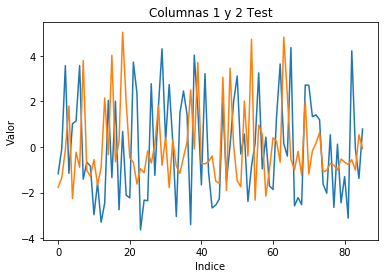

In [84]:
plt.plot(test)
plt.title('Columnas 1 y 2 Test')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

Observando los gráficos anteriores se nota a simple vista que los nuevos parametros generados con PCA no están lo suficientemente relacionados como para observar patrones. Los datos están muy dispersos y no crean comunidades, a la vez que están de los gráficos Valor vs Índice se puede notar con mayor medida el desorden de éstos y que adquieren valores tanto positivos como negativos.
El caso de CPA podría estar señalando que con sólo acotando a d=2 dimensiones se pierden datos importantes, así que quizás sea conveniente buscar alguna dimensión óptima para reducir el problema.

> u) Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente

In [85]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
train = ica.fit_transform(Xstd_train)
test = ica.fit_transform(Xstd_test)
principalDf = pd.DataFrame(data = train
             , columns = ['Columna 1', 'Columna 2'])
finalDf = pd.concat([principalDf, df1[['normal']]], axis = 1)
print('Dimensión conjunto de entrenamiento: {}'.format(train.shape))
print('Dimensión conjunto de prueba: {}'.format(test.shape))

Dimensión conjunto de entrenamiento: (184, 2)
Dimensión conjunto de prueba: (86, 2)


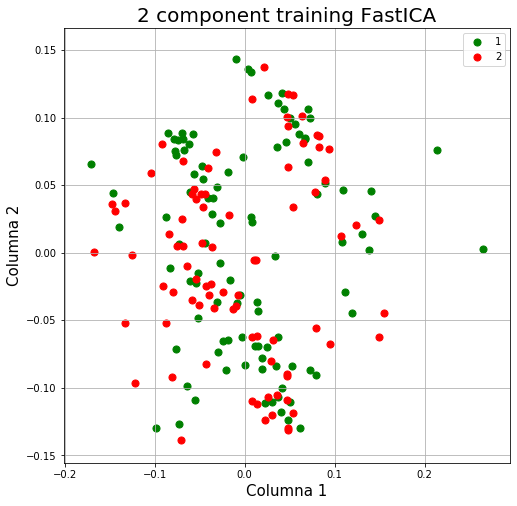

In [86]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Columna 1', fontsize = 15)
ax.set_ylabel('Columna 2', fontsize = 15)
ax.set_title('2 component training FastICA', fontsize = 20)
targets = [1,2]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['normal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Columna 1']
               , finalDf.loc[indicesToKeep, 'Columna 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

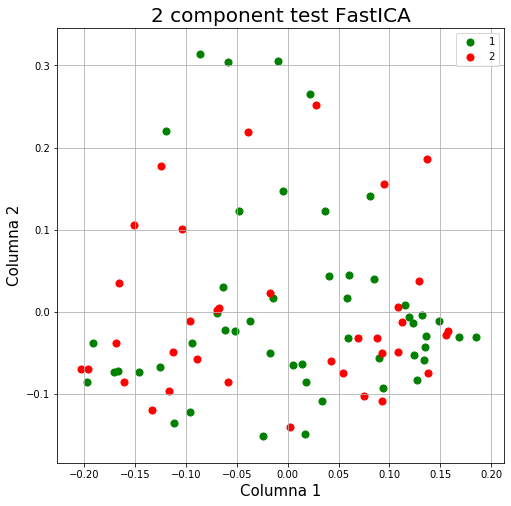

In [87]:
principalDf = pd.DataFrame(data = test
             , columns = ['Columna 1', 'Columna 2'])
finalDf = pd.concat([principalDf, df1[['normal']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Columna 1', fontsize = 15)
ax.set_ylabel('Columna 2', fontsize = 15)
ax.set_title('2 component test FastICA', fontsize = 20)
targets = [1,2]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['normal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Columna 1']
               , finalDf.loc[indicesToKeep, 'Columna 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

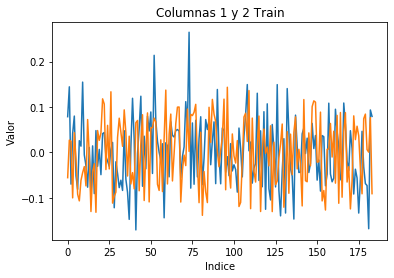

In [88]:
plt.plot(train)
plt.title('Columnas 1 y 2 Train')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

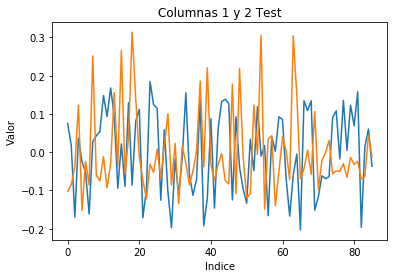

In [89]:
plt.plot(test)
plt.title('Columnas 1 y 2 Test')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

De similar forma al ejercicio anterior, los gráficos muestran que los nuevos parametros generados con ICA no muestran patrones. Pero los datos ya no están tan dispersos y se puede empezar a ver tenuemente la existencia de comunidades de soluciones. A la vez cabe notar que los gráficos Valor vs Índice muestra una tendencia a los datos ser negativos (más visible en el gráfico asociado al conjunto de prueba) por lo que empieza a tener un sentido poder clasificarlos.


> v) ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
test = pca.fit_transform(Xstd_test)
train = pca.fit_transform(Xstd_train)

from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(train, class_label_train)
pred_train = model.predict(train) 
pred_test = model.predict(test)


print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

Score train:  0.717391304347826
Score test:  0.23255813953488372


In [91]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
test = ica.fit_transform(Xstd_test)
train = ica.fit_transform(Xstd_train)

from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(train, class_label_train)
pred_train = model.predict(train) 
pred_test = model.predict(test)


print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

Score train:  0.8206521739130435
Score test:  0.7209302325581395


Utilizando el set de entrenamiento reducido con CPA, se entrenó con la modelo lineal del perceptrón.
Prediciendo sobre el set de entrenamiento se obtuvo un accuracy_score del 71,7% , pero prediciendo sobre el set de pruebas se tuvo un accuracy_score del 23,3%.
En comparanción a los accuracy_score del 80% visto en el modelo del perceptro en el aparatado s), este resultado deja mucho que desear.
En efecto, de los análisis anteriores se estimó que posiblemente se pierde información significativa al reducir la dimensión a sólo 2 para el caso de CPA.

No obstante FastICA demostró ser un mejor reductor de dimensiones al tener accuracy_scores del 80% para su regresión con ambos set de pruebas y entrenamiento.

In [107]:
maximo = 0
for i in range(2, 22): #22 columnas para el conjunto de entrenamiento Xstd_train
    pca_model = PCA(n_components=i)
    pca_model.fit(Xstd_train)
    train = pca_model.transform(Xstd_train)
    test = pca_model.transform(Xstd_test)
    model_PCA = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1).fit(train, class_label_train)
    score = model_PCA.score(train, class_label_train)
    if (score > maximo):
        maximo = score
        d = i
print(f"La dimension óptima para PCA es d = {d} y cuyo puntaje fue score = {maximo}")

La dimension óptima para PCA es d = 15 y cuyo puntaje fue score = 0.8369565217391305


Mediante el uso de una dimensión óptima $d = 15$ para PCA obteniendo un score del 84% superando a Perceptron y FastICA. El costo de lograrlo fueron 15 iteraciones así que claramente la regresión con FastICA pareciera ser la más eficiente.